In [1]:
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

# Load data

In [2]:
%run get_data.ipynb

Top market cap symbols saved to data/top_cap.csv


Processing currencies: 100%|██████████| 59/59 [00:39<00:00,  1.51it/s]

Historical data saved to data/data.csv
Data range: 2024-04-02 00:00:00 to 2025-07-11 00:00:00


In [3]:
TODAY = date.today().strftime('%Y-%m-%d')
TODAY

'2025-07-11'

In [4]:
cap_df = pd.read_csv('data/top_cap.csv')
cap_df

,symbol,name,cap
0,BTCUSDT,Bitcoin,2355595669764
1,ETHUSDT,Ethereum,363826672463
2,USDTUSDT,Tether,159126648478
3,XRPUSDT,XRP,154264475686
4,BNBUSDT,BNB,100593737412
...,...,...,...
95,OSETHUSDT,StakeWise Staked ETH,1133749539
96,IPUSDT,Story,1115710595
97,SOLVBTCUSDT,Solv Protocol BTC,1090203836
98,USDTUSDT,Polygon Bridged USDT (Polygon),1071924195


In [5]:
df = pd.read_csv('data/data.csv')
df_vol = df[['timestamp', 'symbol', 'volume']].copy()

df_vol = df_vol.pivot(index='timestamp', columns='symbol', values='volume')
df_vol = df_vol.dropna(axis=1, how='any')
df_vol

symbol,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TIAUSDT,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBTCUSDT,WIFUSDT,WLDUSDT,XLMUSDT,XRPUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-04-02,202890.239,194496435.1,63332415.0,7418520.79,132649741.3,3843021.89,3239791.28,334867.063,998260.814,1.920809e+12,...,3524345.50,497703758.9,3468324.92,1.760295e+09,446734394.6,17.60071,8.855196e+07,16198186.2,143543681.0,648286441.0
2024-04-03,121257.743,117116217.3,46922280.0,9832273.28,77127875.5,2920598.72,2363000.86,352889.583,683925.233,1.363283e+12,...,2426823.40,434800666.5,4443826.92,1.101709e+09,350808695.2,11.48860,7.205767e+07,13150318.9,142384553.0,493903933.0
2024-04-04,71996.808,134498067.6,45887142.0,3348788.98,62501080.8,2622584.90,1760856.23,558864.969,879640.680,1.533391e+12,...,2406067.50,347105378.4,1867298.17,1.760024e+09,283965922.3,22.99670,6.843767e+07,10455546.8,114457738.0,701629386.0
2024-04-05,81431.321,106755812.6,55120508.0,6327287.98,67223824.2,2177322.47,1789208.04,521720.668,634206.619,1.065948e+12,...,2476407.20,321322582.2,1615645.92,9.925148e+08,333768725.3,27.64068,6.223354e+07,9253732.6,81879640.0,421470900.0
2024-04-06,285335.268,50089819.8,17724296.0,3902626.08,34570081.5,1001203.11,2043537.32,527039.099,226975.996,7.556234e+11,...,1404607.90,196481045.1,927531.29,2.903292e+08,146247595.9,16.52210,4.380208e+07,10833058.9,38928326.0,165404890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,140078.883,79484536.9,18548824.0,2377563.56,48982557.2,696084.55,1162903.04,26412.364,83232.984,6.808864e+12,...,13638714.94,123089504.4,4488528.00,1.115542e+09,190490047.8,46.69465,5.165723e+07,16642310.3,78396659.0,176317450.7
2025-07-08,134841.356,72621236.5,18825497.0,2356953.14,47812337.9,800024.46,1311269.48,30667.256,86374.042,4.959444e+12,...,10633337.49,116239707.4,6693197.61,9.238237e+08,171374796.9,34.76942,3.813489e+07,14809999.8,44628304.0,106456008.6
2025-07-09,207147.580,148070206.3,34089205.0,4722361.78,92847891.7,1812453.38,2690754.32,50698.160,123551.595,5.335322e+12,...,15646390.34,157872852.9,13418615.17,1.040255e+09,298685416.9,79.79129,7.381218e+07,30232621.7,230114409.0,181518399.8


In [6]:
df = df[['timestamp', 'symbol', 'close']]

df = df.pivot(index='timestamp', columns='symbol', values='close')
df = df.dropna(axis=1, how='any')
df


symbol,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TIAUSDT,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBTCUSDT,WIFUSDT,WLDUSDT,XLMUSDT,XRPUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-04-02,115.49,0.5807,0.2343,14.7011,1.4483,10.967,46.86,639.0,551.40,0.000023,...,12.060,0.11662,11.302,0.9998,0.04101,65363.96,3.8471,6.838,0.1286,0.5854
2024-04-03,114.50,0.5693,0.2321,14.1455,1.4793,10.825,45.89,592.8,561.50,0.000022,...,11.950,0.11712,10.868,0.9996,0.04081,66014.30,3.6262,6.744,0.1263,0.5742
2024-04-04,116.35,0.5831,0.2371,14.1534,1.4593,11.012,46.50,665.4,585.50,0.000023,...,12.310,0.11915,10.976,0.9997,0.04178,68472.13,3.5450,6.870,0.1289,0.5935
2024-04-05,113.68,0.5741,0.2294,13.1468,1.4333,10.893,45.30,657.3,577.80,0.000022,...,11.830,0.11790,10.926,0.9996,0.04034,67805.83,3.2189,6.857,0.1275,0.5871
2024-04-06,118.56,0.5836,0.2336,13.2160,1.4871,11.099,48.19,693.9,585.40,0.000023,...,12.040,0.11959,11.241,0.9998,0.04152,68897.05,3.5678,6.978,0.1291,0.5930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,283.22,0.5805,0.1760,4.4540,0.3288,4.047,17.99,496.6,661.06,0.000023,...,1.573,0.28670,7.390,0.9998,0.02043,108212.06,0.8420,0.872,0.2481,2.2708
2025-07-08,293.00,0.5884,0.1792,4.4740,0.3382,4.125,18.36,501.1,660.63,0.000022,...,1.598,0.28740,7.659,0.9998,0.02090,108854.46,0.8480,0.874,0.2596,2.3108
2025-07-09,301.68,0.6227,0.1922,4.6380,0.3554,4.313,19.50,514.5,668.68,0.000021,...,1.692,0.28990,8.301,0.9997,0.02241,111112.62,0.9600,0.913,0.2883,2.4038


# Solver

In [ ]:
def find_optimal_parameters(df, symbol_list=None, 
                            min_last_days=90, max_last_days=180, step_day=10,
                            min_procent=0.01, max_procent=0.3, step_procent=0.01,
                            min_std_procent=0.01, max_std_procent=0.3, step_std=0.01):
    results = {}

    if symbol_list is None:
        symbol_list = df.columns.tolist()

    for symbol in tqdm(symbol_list, desc='Processing Symbols'):
        optimal_procent = max_procent
        optimal_last_days = min_last_days
        optimal_std_procent = max_std_procent

        last_price = df[symbol].iloc[-1]

        for last_days in range(min_last_days, max_last_days + 1, step_day):
            df_slice = df[symbol].iloc[-last_days:]
            mean_val = df_slice.mean()
            df_warning_100 = df[symbol].iloc[-101:-1]
            df_warning_30 = df[symbol].iloc[-31:-1]

            for std_procent in np.arange(max_std_procent, min_std_procent, -step_std):
                std_n = mean_val * std_procent

                for procent in np.arange(max_procent, min_procent, -step_procent):
                    min_historical = df[symbol].iloc[:-31].min()
                    min_historical_coeff = min_historical * (procent + 1.0)
                    min_support_100 = df_warning_100.min()
                    min_support_30 = df_warning_30.min()
                    max_historical = df[symbol].iloc[:-31].max()
                    max_resist_100 = df_warning_100.max()
                    max_resist_30 = df_warning_30.max()
                    mean_100 = df_warning_100.mean()
                    mean_30 = df_warning_30.mean()

                    if (df_slice.std() <= std_n) and (mean_val <= min_historical_coeff) and (last_price >= min_support_30):

                        if (procent < optimal_procent or
                            (procent == optimal_procent and last_days > optimal_last_days) or
                            (procent == optimal_procent and last_days == optimal_last_days and std_procent < optimal_std_procent)):
                            optimal_procent = procent
                            optimal_last_days = last_days
                            optimal_std_procent = std_procent

        if symbol != 'BTCUSDT':
            if (optimal_procent == max_procent) & (optimal_last_days == min_last_days) & (optimal_std_procent == max_std_procent):
                continue

        results[symbol] = (optimal_procent, optimal_last_days, optimal_std_procent, 
                           min_support_100, min_support_30, min_historical, 
                           max_historical, max_resist_100, max_resist_30, 
                           last_price, mean_100, mean_30)

    results = pd.DataFrame(results).T
    results.columns = ['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent', 
                       'Min Support 100', 'Min Support 30', 'Min Historical', 
                       'Max Historical', 'Max Resist 100', 'Max Resist 30', 
                       'Last Price', 'Mean 100', 'Mean 30']
    results = results.sort_values(by=['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent'], 
                                    ascending=[True, False, False])

    return results

In [19]:
optimal_symbol = find_optimal_parameters(df)

Processing Symbols: 100%|██████████| 45/45 [00:30<00:00,  1.46it/s]


In [20]:
ignore_symbols = ['USDCUSDT', 'FDUSDUSDT']
optimal_symbol = optimal_symbol[~optimal_symbol.index.isin(ignore_symbols)]

In [21]:
optimal_symbol

,Optimal Procent,Optimal Last Days,Optimal Std Procent,Min Support 100,Min Support 30,Min Historical,Max Historical,Max Resist 100,Max Resist 30,Last Price,Mean 100,Mean 30
ICPUSDT,0.12,100.0,0.07,4.555000,4.555000,4.587000,17.906000,6.177000,6.066000,5.517000,5.104910,5.056100
OPUSDT,0.13,100.0,0.14,0.486000,0.486000,0.590000,3.365000,0.910000,0.694000,0.683000,0.664810,0.565300
APTUSDT,0.14,100.0,0.09,3.930000,3.930000,4.348000,14.701100,6.138000,5.021000,4.972000,4.954370,4.594500
FILUSDT,0.15,100.0,0.11,2.069000,2.069000,2.266000,9.310000,3.245000,2.692000,2.629000,2.596620,2.339267
TIAUSDT,0.16,90.0,0.24,1.352000,1.352000,1.950000,12.480000,3.342000,2.106000,1.915000,2.285090,1.618333
DOTUSDT,0.19,100.0,0.13,3.153000,3.153000,3.378000,10.673000,5.309000,4.189000,3.987000,3.991230,3.540000
SHIBUSDT,0.21,130.0,0.10,0.000011,0.000011,0.000011,0.000033,0.000017,0.000013,0.000013,0.000013,0.000012
ETCUSDT,0.21,110.0,0.08,14.070000,15.190000,14.070000,38.270000,20.700000,18.490000,18.640000,16.963300,16.635667
ATOMUSDT,0.23,130.0,0.09,3.719000,3.719000,3.580000,11.305000,5.384000,4.618000,4.675000,4.380680,4.080833
AVAXUSDT,0.26,130.0,0.11,16.040000,16.530000,16.040000,53.980000,25.820000,21.570000,21.100000,20.318700,18.397000


In [22]:
result = optimal_symbol.index.to_list()

In [23]:
result = result[:10]
result

['ICPUSDT',
 'OPUSDT',
 'APTUSDT',
 'FILUSDT',
 'TIAUSDT',
 'DOTUSDT',
 'SHIBUSDT',
 'ETCUSDT',
 'ATOMUSDT',
 'AVAXUSDT']

# Побудова графіку

In [ ]:
def paint_result(df, result, info_df, cap_df, volume_df, last_days=365):
    num_symbols = len(result)
    fig, axes = plt.subplots(nrows=num_symbols, ncols=1, figsize=(16, 6 * num_symbols), sharex=False)

    if num_symbols == 1:
        axes = [axes]

    global_norm = pd.DataFrame()
    for symbol in result:
        series = df[symbol].iloc[-last_days:]
        norm_series = (series - series.min()) / (series.max() - series.min())
        global_norm[symbol] = norm_series
    global_line = global_norm.mean(axis=1)

    for idx, symbol in enumerate(result):
        series = df[symbol].iloc[-last_days:]
        volume_series = volume_df[symbol].iloc[-last_days:]
        ax = axes[idx]

        # ==== Графік ціни ====
        series.plot(ax=ax, label='Price', color='gray', linewidth=1.5)

        # ==== Глобальна лінія ====
        global_scaled = global_line * (series.max() - series.min()) + series.min()
        global_scaled.plot(ax=ax, label='Global Mean', color='black', linestyle='dotted', linewidth=0.5)

        # ==== 100-денна ковзна ====
        ma100_full = df[symbol].rolling(window=100).mean()
        ma100 = ma100_full.iloc[-last_days:]
        ma100.plot(ax=ax, color='blue', linestyle='-', linewidth=1.2, label='MA 100')

        ma100_global = global_scaled.rolling(window=100).mean()
        ma100_global.plot(ax=ax, color='blue', linestyle='dotted', linewidth=0.5, label='Global MA 100')
        # ==== 30-денна ковзна ====
        ma30_full = df[symbol].rolling(window=30).mean()
        ma30 = ma30_full.iloc[-last_days:]
        ma30.plot(ax=ax, color='orange', linestyle='-', linewidth=1.2, label='MA 30')

        # ==== Лінії підтримки та опору ====
        symbol_cap = cap_df[cap_df['symbol'] == symbol]['cap'].values[0] / 1_000_000_000
        min_support_100 = info_df.loc[symbol, 'Min Support 100']
        max_resist_100 = info_df.loc[symbol, 'Max Resist 100']
        min_support_30 = info_df.loc[symbol, 'Min Support 30']
        max_resist_30 = info_df.loc[symbol, 'Max Resist 30']
        last_price = info_df.loc[symbol, 'Last Price']
        max_historical = info_df.loc[symbol, 'Max Historical']

        # ==== Розрахунок TP та SL ====
        TP = (max_resist_100 + max_resist_30) / 2
        profit_pct = ((TP - last_price) / last_price) * 100
        min_historical = info_df.loc[symbol, 'Min Historical']
        SL = min_historical * 0.8

        # ==== Фарбування ділянок підтримки та опору ====
        ax.axhspan(min_support_100, max_resist_100, color='lightgreen', alpha=0.1)
        ax.axhspan(max_resist_30, max_resist_100, color='red', alpha=0.1)

        ax.axhline(last_price, color='green', linestyle='--',
                   label=f"Last Price ({last_price:.2f})")
        ax.text(series.index[-1], last_price, f' {last_price:.2f}', 
                verticalalignment='bottom', color='green', fontsize=10)
        
        ax.axhline(min_support_100, color='gray', linestyle='dotted',
                   label=f"Min Support 100 ({min_support_100:.2f})")
        ax.axhline(min_support_30, color='orange', linestyle='--',
                   label=f"Min Support 30 ({min_support_30:.2f})")

        ax.axhline(max_resist_100, color='gray', linestyle='dotted',
                   label=f"Max Resist 100 ({max_resist_100:.2f})")
        ax.axhline(max_resist_30, color='gray', linestyle='dotted',
                   label=f"Max Resist 30 ({max_resist_30:.2f})")
        
        ax.axhline(info_df.loc[symbol, 'Min Historical'], color='red', linestyle='--',
                   label=f"Min Historical ({info_df.loc[symbol, 'Min Historical']:.2f})")
        ax.axhline(info_df.loc[symbol, 'Max Historical'], color='red', linestyle='--',
                   label=f"Max Historical ({info_df.loc[symbol, 'Max Historical']:.2f})")
        
        if last_price > max_historical:
            ax.axhspan(max_historical, last_price, color='yellow', alpha=0.5, label='Above Max Historical')

        # ==== Найбільший обʼєм за останні 100 днів ====
        vol_max_idx_100 = volume_series[-100:].idxmax()
        vol_mean_100 = volume_series[-100:].mean()
        if volume_series[vol_max_idx_100] > vol_mean_100 * 3:
            price_at_vol_max_100 = series.loc[vol_max_idx_100]
            pos_100 = series.index.get_loc(vol_max_idx_100)

            ax.text(pos_100, price_at_vol_max_100, f' {price_at_vol_max_100:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Найбільший обʼєм за останні 30 днів ====
        vol_max_idx_30 = volume_series[-30:].idxmax()
        vol_mean_30 = volume_series[-30:].mean()
        if volume_series[vol_max_idx_30] > vol_mean_30 * 3:
            price_at_vol_max_30 = series.loc[vol_max_idx_30]
            pos_30 = series.index.get_loc(vol_max_idx_30)

            ax.text(pos_30, price_at_vol_max_30, f' {price_at_vol_max_30:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Лінії часу ====
        if len(series) >= 100:
            pos_30 = len(series) - 30
            pos_100 = len(series) - 100
            
            ax.axvline(pos_30, color='gray', linestyle=':', label='30 Days Ago')
            ax.axvline(pos_100, color='gray', linestyle=':', label='100 Days Ago')

        # ==== Накладання обʼєму ====
        ax.set_title(f"{symbol} ({symbol_cap:.2f}B USD) — Potential Profit: {profit_pct:.2f}% (SL: {SL:.2f}, TP: {TP:.2f})", fontsize=14)
        ax.legend(loc='upper left', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.5)

        lower_limit = min_support_100 * 0.9
        upper_limit = max_resist_100 * 1.1
        ax.set_ylim(lower_limit, upper_limit)
        vol_scaled = volume_series / volume_series.max() * (upper_limit - lower_limit) * 0.2 + lower_limit
        ax.fill_between(vol_scaled.index, vol_scaled, color='gray', alpha=0.3, label='Volume (scaled)')

    plt.tight_layout()
    plt.savefig(f'pdf_store/{TODAY}.pdf', dpi=300, bbox_inches='tight')
    try:
        plt.savefig(f'/Users/aleksejkitajskij/Library/Mobile Documents/com~apple~CloudDocs/bit_research/{TODAY}.pdf', dpi=300, bbox_inches='tight')
    except Exception as e:
        print(f"Error saving PDF to iCloud")
    plt.show()

In [59]:
def paint_all(df, symbols, last_days=365):
    data = df[symbols].iloc[-last_days:].copy()

    for symbol in symbols:
        series = data[symbol]
        min_val = series.min()
        max_val = series.max()
        data[symbol] = (series - min_val) / (max_val - min_val)

    plt.figure(figsize=(16,8))
    x = range(len(data))
    for symbol in symbols:
        plt.plot(x, data[symbol], label=symbol, linewidth=1.0)
    
    plt.title(f'Normalized Price Chart for {len(symbols)} Symbols (last {last_days} days)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (0-1)')
    plt.legend()
    plt.show()


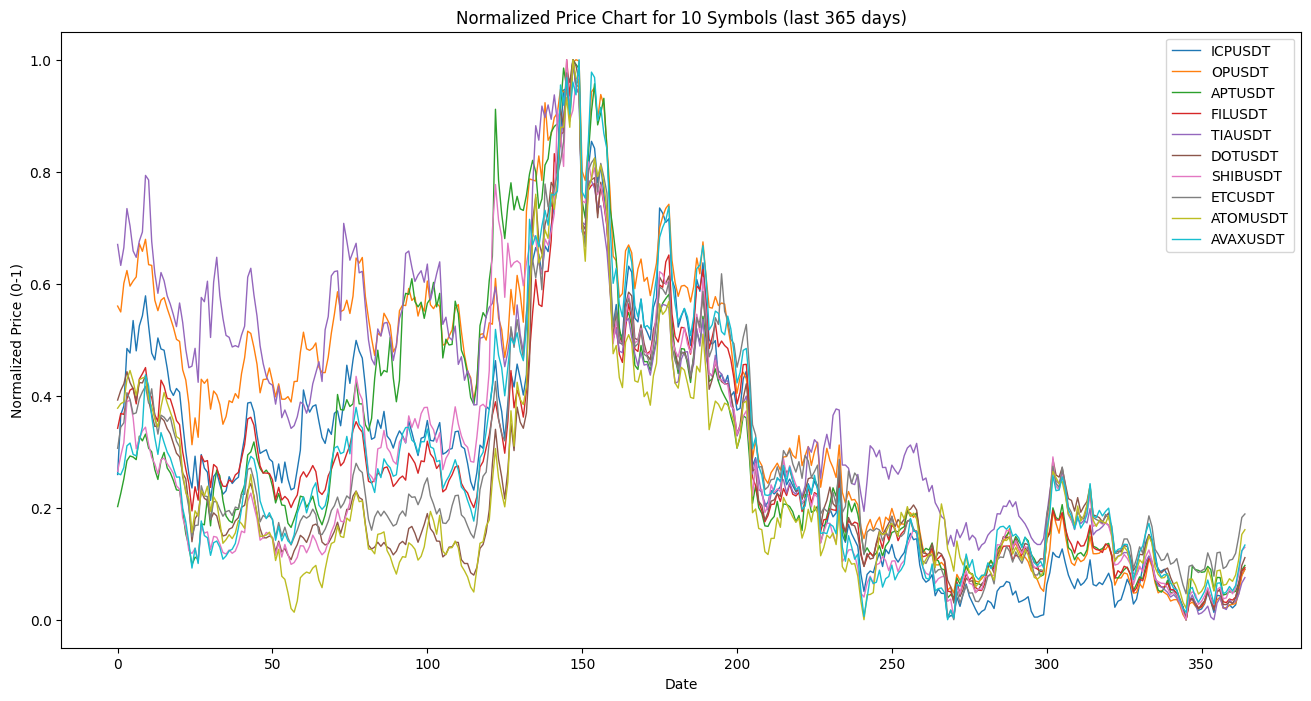

In [60]:
paint_all(df, result, last_days=365)

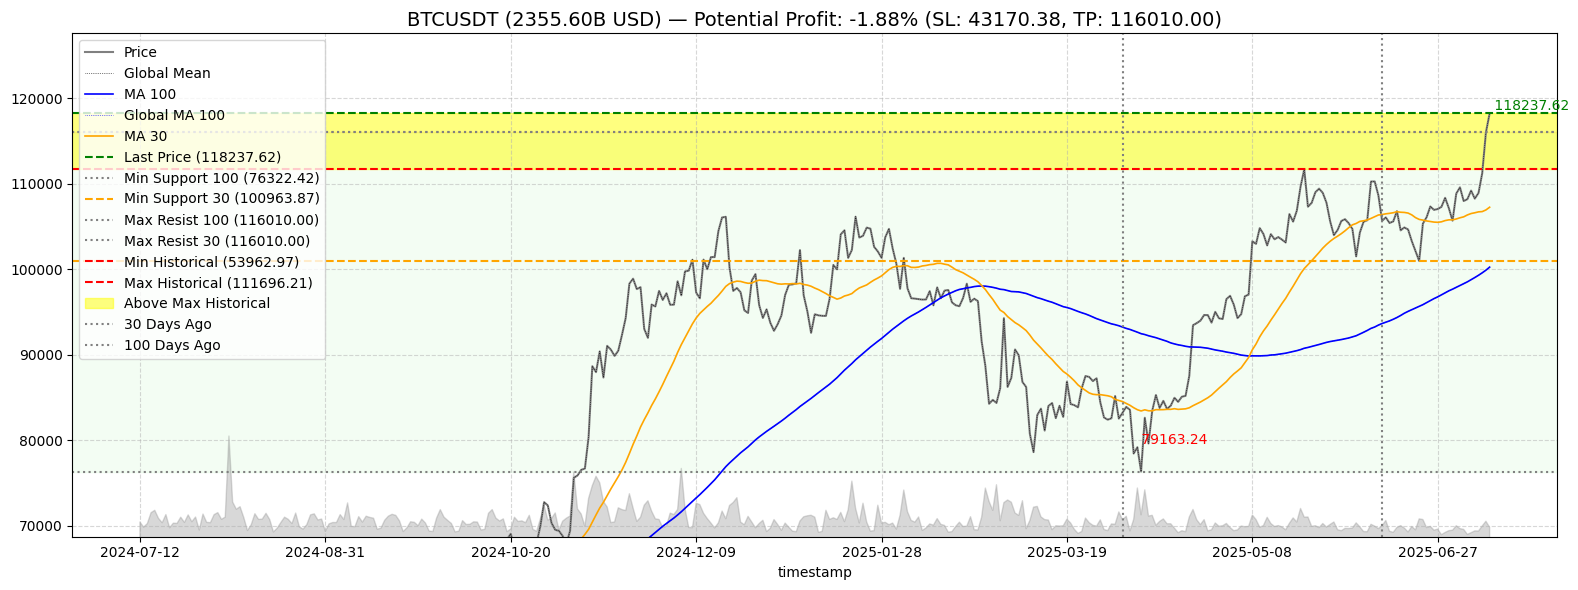

In [61]:
paint_result(df, ['BTCUSDT'], optimal_symbol, cap_df, df_vol, last_days=365)

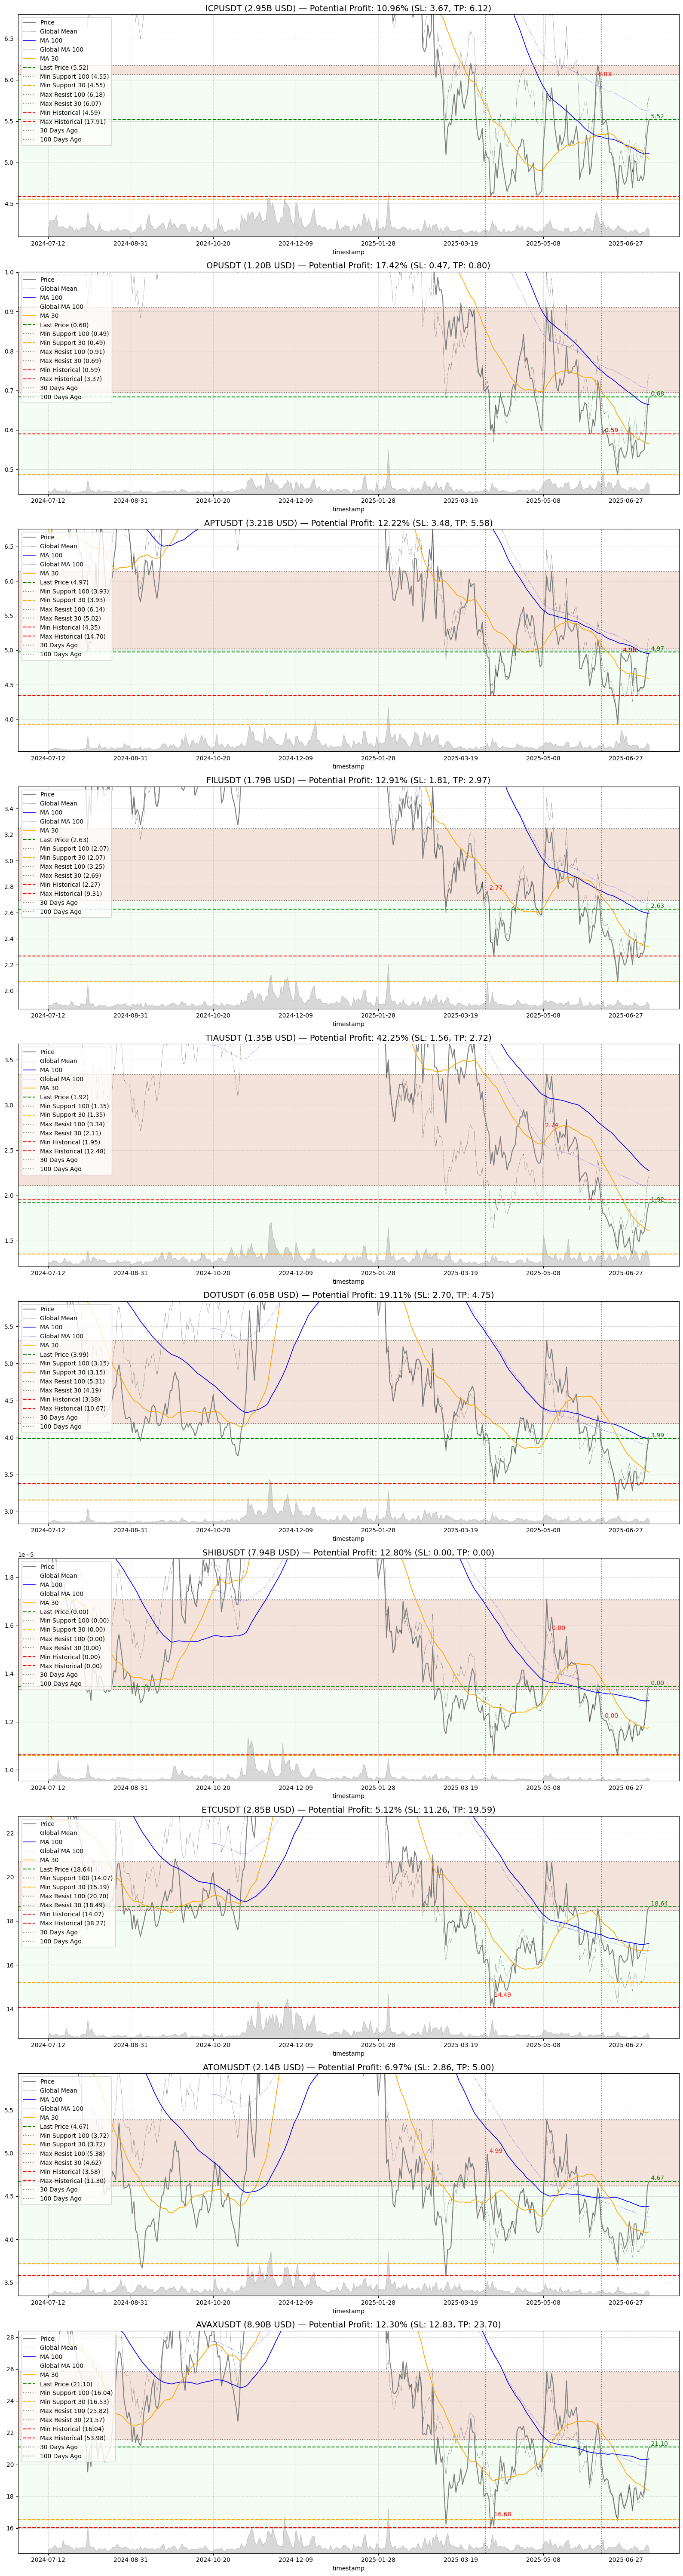

In [62]:
paint_result(df, result, optimal_symbol, cap_df, df_vol, last_days=365)